# Superstore Data Analysis by ANSHIKA GUPTA

This project aims to analyse the SampleSuperstore dataset which contains data about a superstore and the sales done along with other factors like Location of the Store, Discounts, Quantity sold and corresponding profits made.

In [1]:
project_name = "SuperStore Dataset Analysis" 

## Data Preparation and Cleaning


In [100]:
import pandas as pd
import numpy as np

In [4]:
raw_df = pd.read_csv('SampleSuperstore.csv')

In [5]:
raw_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


The dataset has been downloaded and extracted. The csv file contains 9994 rows and 13 columns. It provides insights about the Ship mode, segment, country, city, Category etc relating to the listed stores.

In [6]:
raw_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
selected_columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 
                  'Postal Code','Region', 'Category', 'Sub-Category', 'Sales', 
                  'Quantity', 'Discount','Profit']
len(selected_columns)


13

Let's extract a copy of the data from these columns into a new data frame store_df, which we can continue to modify further without affecting the original data frame.

In [8]:
store_df = raw_df[selected_columns].copy()

In [9]:
store_df.shape

(9994, 13)

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


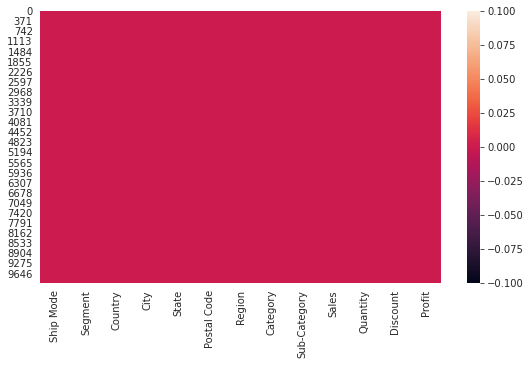

In [16]:
plt.show(sns.heatmap(store_df.isnull()))

Observations
- Most columns have data type `object` or `float`. 
- Only 2 columns, Quantity and Postal Code have data type `int64`.This distribution can be observed as most of the columns have data as Names of places and Subjects, hence `object`. 
- There are no null values in this table.

In [11]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


As seen above, the Superstore dataset contains record of Sales distributed along with the Postal Code of the store and respective quantities sold, Discount given and Profit obtained. Since the column `Postal Code` is isn't a quantity metric, we cannot infer much information for it's metrics. 

In [12]:
store_df.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3792,First Class,Corporate,United States,Altoona,Pennsylvania,16602,East,Office Supplies,Art,16.032,6,0.2,2.2044
1915,Standard Class,Home Office,United States,Boynton Beach,Florida,33437,South,Office Supplies,Art,15.528,3,0.2,4.8525
343,Second Class,Corporate,United States,Philadelphia,Pennsylvania,19140,East,Technology,Phones,71.928,12,0.4,8.3916
7383,Standard Class,Consumer,United States,Omaha,Nebraska,68104,Central,Office Supplies,Paper,17.610,3,0.0,8.4528
4589,Second Class,Home Office,United States,Danville,California,94526,West,Office Supplies,Storage,452.550,7,0.0,22.6275
9619,Standard Class,Corporate,United States,Bowling Green,Ohio,43402,East,Technology,Accessories,139.960,5,0.2,-1.7495
5493,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
3926,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Furniture,Furnishings,35.340,2,0.0,13.4292
6251,First Class,Consumer,United States,Chicago,Illinois,60623,Central,Office Supplies,Appliances,2.394,1,0.8,-6.3441
3590,Standard Class,Home Office,United States,Richmond,Kentucky,40475,South,Office Supplies,Storage,1443.960,12,0.0,375.4296


## Exploratory Analysis and Visualization



In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#fff'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc1725780>,
      dtype=object)

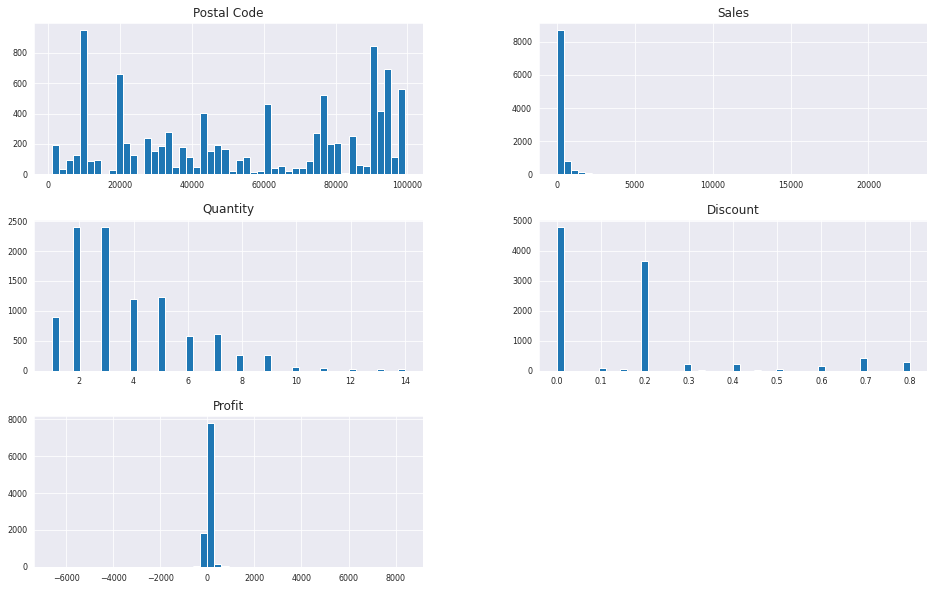

In [14]:
store_df.hist(figsize=(16,10), bins=50, xlabelsize=8, ylabelsize=8)

In [22]:
count_of_stores = store_df['City'].value_counts().head(15)
count_of_stores

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Name: City, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


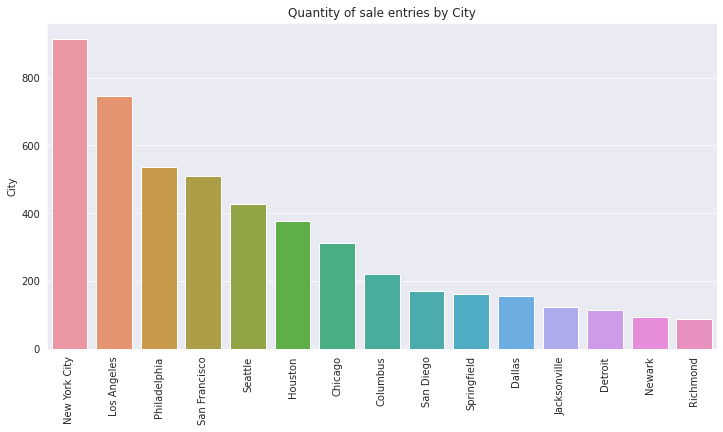

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.ylabel("No. of movies produced")
# plt.xlabel()
plt.title("Quantity of sale entries by City")
sns.barplot(count_of_stores.index,count_of_stores);

Observations
- Maximum number of Sales in Newyork followed by Log Angeles and philadelphia. 
- Cities like Cheyenne, Citrus heights and Pensacola, etc have only 1 store. 

###Segment
Let's look at the number of countries from there are movies and TV shows in this dataset, and plot the 10 countries with the highest number of productions.

In [ ]:
store_df.Segment

0        Consumer
1        Consumer
2       Corporate
3        Consumer
4        Consumer
          ...    
9989     Consumer
9990     Consumer
9991     Consumer
9992     Consumer
9993     Consumer
Name: Segment, Length: 9994, dtype: object

In [ ]:
store_df.Segment.nunique()

3

In [ ]:
top_seg= store_df.Segment.value_counts()
top_seg

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

We can now visualize this using a pie chart

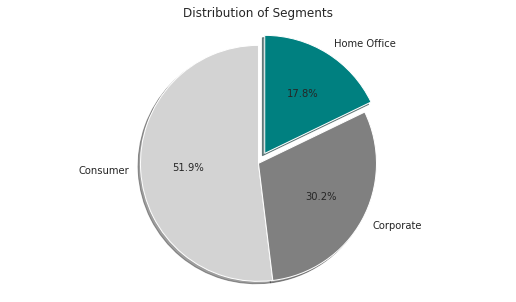

In [ ]:
my_data = top_seg
my_labels = 'Consumer','Corporate','Home Office'
my_colors = ['lightgrey','grey','teal']
my_explode = (0,0,0.1)
plt.pie(my_data,explode = my_explode,startangle = 90,labels=my_labels,colors=my_colors,shadow= True,autopct='%1.1f%%')
plt.title('Distribution of Segments')
plt.axis('equal')
plt.show()

It appears that a disproportionately high number of sales belonged to the `Consumer` segment, followe by the `Corporate` segment having 30.2 % parts and `Home Office` with 17.8 %. 

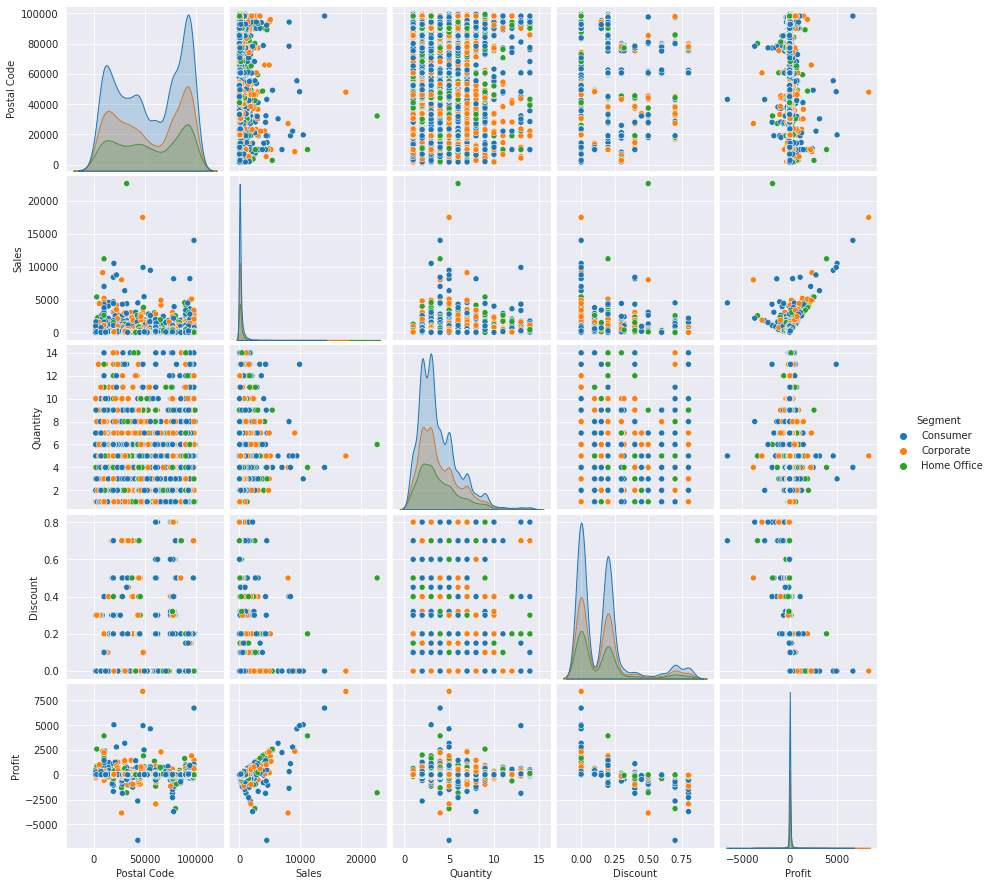

In [39]:
sns.pairplot(store_df, hue='Segment');

### Ship Mode 

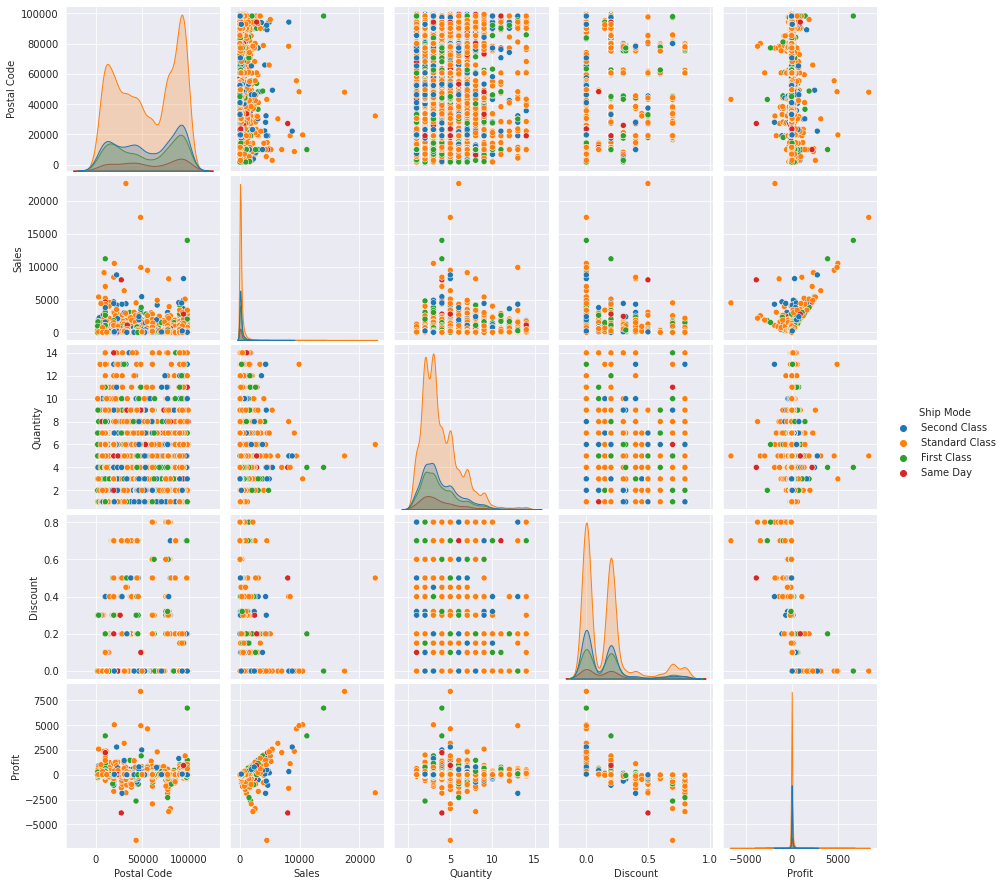

In [40]:
sns.pairplot(store_df, hue='Ship Mode');

In [43]:
shipmode_count = store_df["Ship Mode"].value_counts()
shipmode_count

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

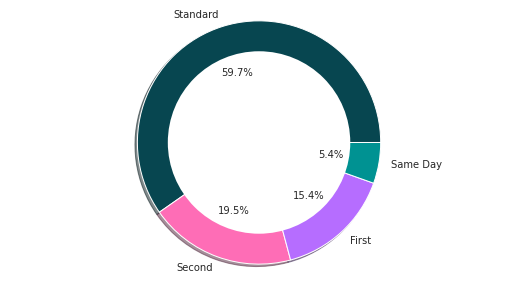

In [60]:

# The slices will be ordered and plotted counter-clockwise.
labels = 'Standard', 'Second', 'First', 'Same Day'
colors = ['#074650', '#fe6db6', '#b66dff', '#009292']
explode = (0, 0, 0, 0)  # explode a slice if required

plt.pie(shipmode_count, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

Observations
- Most commnly used ship mode = Standard
- Least commnly used ship mode = Same Day

### Region

In [75]:
region_count = store_df["Region"].value_counts()
region_count

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<function matplotlib.pyplot.show>

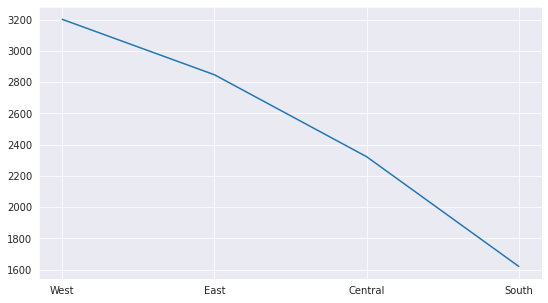

In [77]:
plt.plot(region_count)
plt.show

Observations
- Maximum amount of Entries in West Region
- Minimum amount of Entries in South Region

### Category

In [81]:
category_count = store_df["Category"].value_counts()
category_count


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

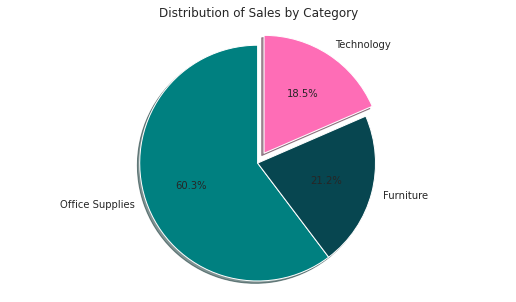

In [110]:
my_data = category_count
my_labels = 'Office Supplies','Furniture','Technology'
my_colors = ['teal','#074650','#fe6db6']
my_explode = (0,0,0.1)
plt.pie(my_data,explode = my_explode,startangle = 90,labels=my_labels,colors=my_colors,shadow= True,autopct='%1.1f%%')
plt.title('Distribution of Sales by Category')
plt.axis('equal')
plt.show()

## Inferences and Conclusion

Summary of the inferences drawn from the dataset.

This Notebook:
-  Majority of the sales entries have quantity 2 and 3
- Approx half of the listed entries have discount applied
- City : New york has Max amount of entries
- Consumer segment has max quantity of sales, Home Office has least
- Sales and Profit seen to have direct relation with the quantity sold. More Sales and Profits were generated when quantiy sold was between 2-8
- Profit and Discount also share a linear relationship as, higher Discount relates to lower Profit
- Standard class ShipMode is seen to be most preferred with max amount of sale records and generated profit.
- Same day ShipMode is least used
- Highest sale records by region are in West
- Least Sale records by region are in South
-By Category, highest sale record in Office Supplies and least in Technology


Power BI :
- Max average sales in Wyoming state though only 1 record exists
- Avg Profit by Region: 
  - Max for Standard Class Shipmode for all regions
  - First Class generates least profit for all regions except South
  - Same Day produces least profit in South
  - Profits generated by regions follow the order : West - East - South - Central, with West being highest and Central being lowest
- Average Discount by Segment:
  - All the segments - Consumer, Corporate and Home Office provide almost equal discounts
  - Home Office : 
    - 1783 Sales in 264 cities
    - Max avg profit in East, least in South
  - Corporate : 
    - 3020 Sales in 340 cities
    - Max avg profit in East, least in South
  - Consumer : 
    - 5191 Sales in 422 cities
    - Max avg profit in West, least in Central
- Average Profit and Sales by Sub-Category
  - Profit and Sales follow an amiguous relationship
  - Profit and Sales are Max for SubCategory-Copiers
  - Least Sales for Fasteners
  - Least Profit for Tables
  - This above mentioned trends are true for all regions except South, were:
    - Highest Sales were by Machines SubCategory
- Average Profit and Quantity by Category
  - Max Avg Profit for Technology, Least for Furniture
  - Technology:
    - 1847 Sale records in 343 Cities
    - Equally high profits in East and West regions
    - Least profit in South
    - Max avg sale in District of Columbia
    - Highest avg profit and sales production is in Copiers
  - Office Supplies:
    - 6026 Sale records in 484 Cities
    - Majority profit in West Region
    - Least profit in Central Region
    - Highest avg profit and sales production is in Storage
    - Max avg sale in Vermont
  - Furniture:
    - 2121 Sale records in 371 Cities
    - Majority profit in South Region
    - Least profit in Central Region
    - Highest avg profit and sales production is in Tables
    - Max avg sale in Vermont

